<a href="https://colab.research.google.com/github/kaljuvee/datascience/blob/master/notebooks/ml/autoencoder_svr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model

Epoch 1/400
42/42 - 0s - loss: 0.3603 - val_loss: 0.1785
Epoch 2/400
42/42 - 0s - loss: 0.1391 - val_loss: 0.1451
Epoch 3/400
42/42 - 0s - loss: 0.0967 - val_loss: 0.1128
Epoch 4/400
42/42 - 0s - loss: 0.0759 - val_loss: 0.0913
Epoch 5/400
42/42 - 0s - loss: 0.0628 - val_loss: 0.0751
Epoch 6/400
42/42 - 0s - loss: 0.0533 - val_loss: 0.0627
Epoch 7/400
42/42 - 0s - loss: 0.0467 - val_loss: 0.0565
Epoch 8/400
42/42 - 0s - loss: 0.0415 - val_loss: 0.0479
Epoch 9/400
42/42 - 0s - loss: 0.0370 - val_loss: 0.0450
Epoch 10/400
42/42 - 0s - loss: 0.0343 - val_loss: 0.0436
Epoch 11/400
42/42 - 0s - loss: 0.0313 - val_loss: 0.0407
Epoch 12/400
42/42 - 0s - loss: 0.0287 - val_loss: 0.0389
Epoch 13/400
42/42 - 0s - loss: 0.0273 - val_loss: 0.0381
Epoch 14/400
42/42 - 0s - loss: 0.0259 - val_loss: 0.0354
Epoch 15/400
42/42 - 0s - loss: 0.0243 - val_loss: 0.0352
Epoch 16/400
42/42 - 0s - loss: 0.0235 - val_loss: 0.0338
Epoch 17/400
42/42 - 0s - loss: 0.0223 - val_loss: 0.0330
Epoch 18/400
42/42 - 0s

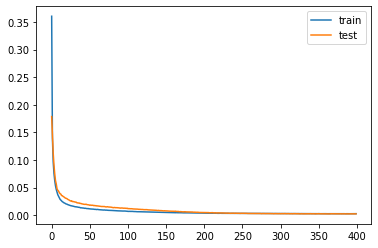

MinMaxScaler(copy=True, feature_range=(0, 1))

In [3]:
# train autoencoder for regression with no compression in the bottleneck layer
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# number of input columns
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define encoder
visible = Input(shape=(n_inputs,))
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = ReLU()(e)
# define bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)
# define decoder
d = Dense(n_inputs*2)(bottleneck)
d = BatchNormalization()(d)
d = ReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=400, batch_size=16, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

t

In [4]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# reshape target variables so that we can transform them
y_train = y_train.reshape((len(y_train), 1))
y_test = y_test.reshape((len(y_test), 1))
# scale input data
trans_in = MinMaxScaler()
trans_in.fit(X_train)
X_train = trans_in.transform(X_train)
X_test = trans_in.transform(X_test)
# scale output data
trans_out = MinMaxScaler()
trans_out.fit(y_train)
y_train = trans_out.transform(y_train)
y_test = trans_out.transform(y_test)
# load the model from file
encoder = load_model('encoder.h5')
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define model
model = SVR()
# fit model on the training dataset
model.fit(X_train_encode, y_train)
# make prediction on test set
yhat = model.predict(X_test_encode)
# invert transforms so we can calculate errors
yhat = yhat.reshape((len(yhat), 1))
yhat = trans_out.inverse_transform(yhat)
y_test = trans_out.inverse_transform(y_test)
# calculate error
score = mean_absolute_error(y_test, yhat)
print(score)

69.23520450134671


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**References**

* [Auto Encoder for Regression](https://machinelearningmastery.com/autoencoder-for-regression/)